## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [137]:
import pandas  as pd

df = pd.read_csv("QueryResults.csv")

In [138]:
df.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [139]:
df = pd.read_csv("./QueryResults.csv")
df.columns = ['DATE', 'TAG', 'POSTS']
df["DATE"] = pd.to_datetime(df["DATE"], infer_datetime_format=True)

df.head(5)

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [140]:
df.tail(5)

,DATE,TAG,POSTS
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182
1990,2020-07-01,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [141]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [142]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [143]:
df.groupby("TAG").aggregate({"POSTS":"sum"}).sort_values("POSTS", ascending=False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [144]:
df.head(2)

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8


In [145]:
df.dtypes

DATE     datetime64[ns]
TAG              object
POSTS             int64
dtype: object

In [146]:
df_date_diff = df.groupby(["TAG"]).aggregate(release_date=("DATE","min"), last_date=("DATE","max"))
df_date_diff

,release_date,last_date
TAG,,
assembly,2008-08-01,2020-07-01
c,2008-08-01,2020-07-01
c#,2008-07-01,2020-07-01
c++,2008-08-01,2020-07-01
delphi,2008-08-01,2020-07-01
go,2009-11-01,2020-07-01
java,2008-08-01,2020-07-01
javascript,2008-08-01,2020-07-01
perl,2008-08-01,2020-07-01


In [147]:
df_date_diff["release_date"] = pd.to_datetime(df_date_diff["release_date"], infer_datetime_format=True)
df_date_diff["last_date"] = pd.to_datetime(df_date_diff["last_date"], infer_datetime_format=True)

df_date_diff["date_range"] = (df_date_diff["last_date"] - df_date_diff["release_date"])
df_date_diff

,release_date,last_date,date_range
TAG,,,
assembly,2008-08-01,2020-07-01,4352 days
c,2008-08-01,2020-07-01,4352 days
c#,2008-07-01,2020-07-01,4383 days
c++,2008-08-01,2020-07-01,4352 days
delphi,2008-08-01,2020-07-01,4352 days
go,2009-11-01,2020-07-01,3895 days
java,2008-08-01,2020-07-01,4352 days
javascript,2008-08-01,2020-07-01,4352 days
perl,2008-08-01,2020-07-01,4352 days


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [148]:
# Already done above

## Data Manipulation



In [149]:
# Pivot Table, to make a separate column for each category
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
# test_df
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [150]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [151]:
reshaped_df.shape
#145 rows, 14 columns

(145, 14)

In [152]:
reshaped_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [153]:
reshaped_df.tail(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [154]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [155]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [156]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head(3)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0


In [157]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [158]:
df.head(2)

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8


In [159]:
import matplotlib.pyplot as plt

In [160]:
df_java = df[df["TAG"] == "java"]
df_java.head(3)

,DATE,TAG,POSTS
8,2008-08-01,java,222
16,2008-09-01,java,1137
25,2008-10-01,java,1153


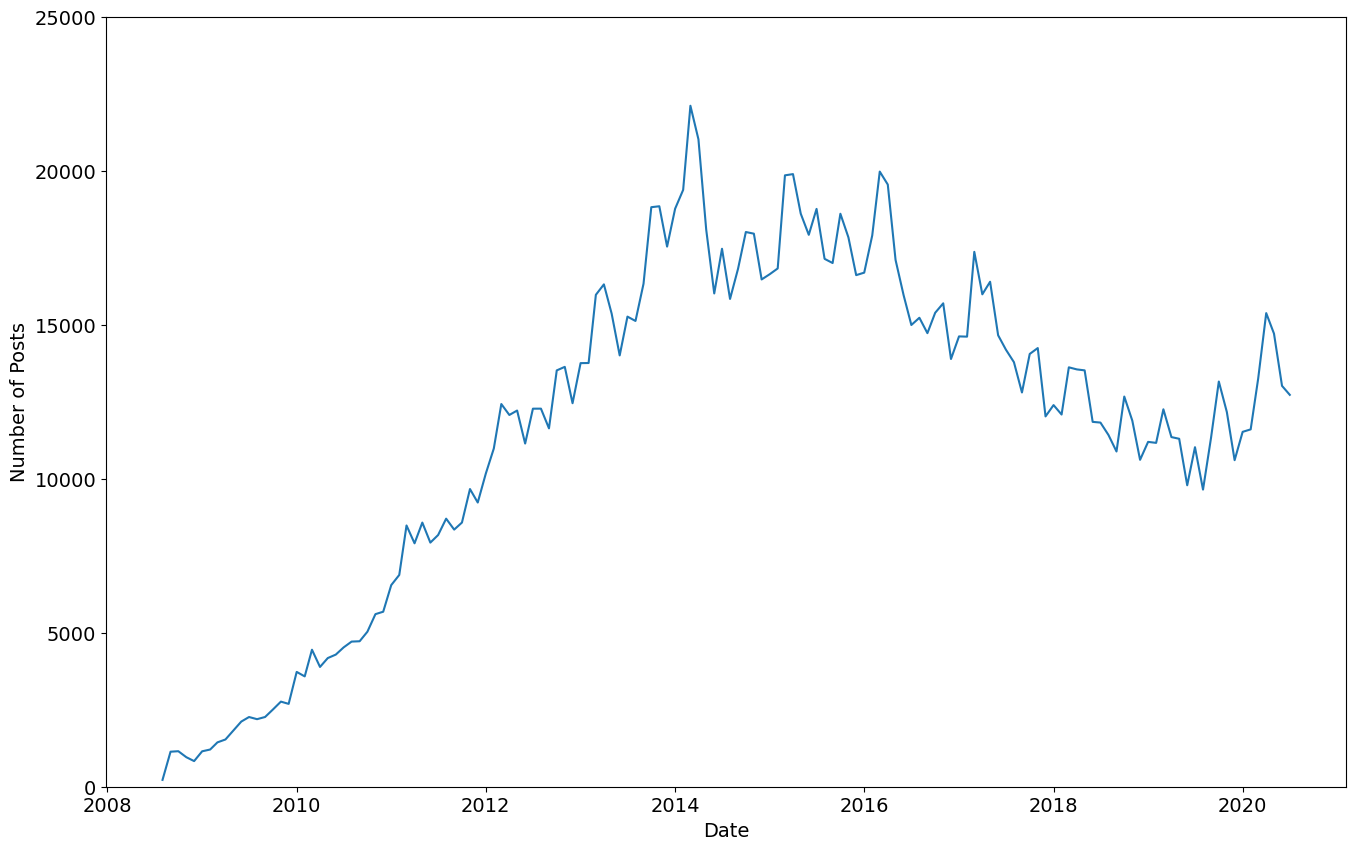

In [161]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,25000)
plt.plot(df_java["DATE"], df_java["POSTS"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [162]:
df_python = df[df["TAG"] == "python"]
df_python.head(3)

,DATE,TAG,POSTS
4,2008-08-01,python,124
19,2008-09-01,python,542
31,2008-10-01,python,510


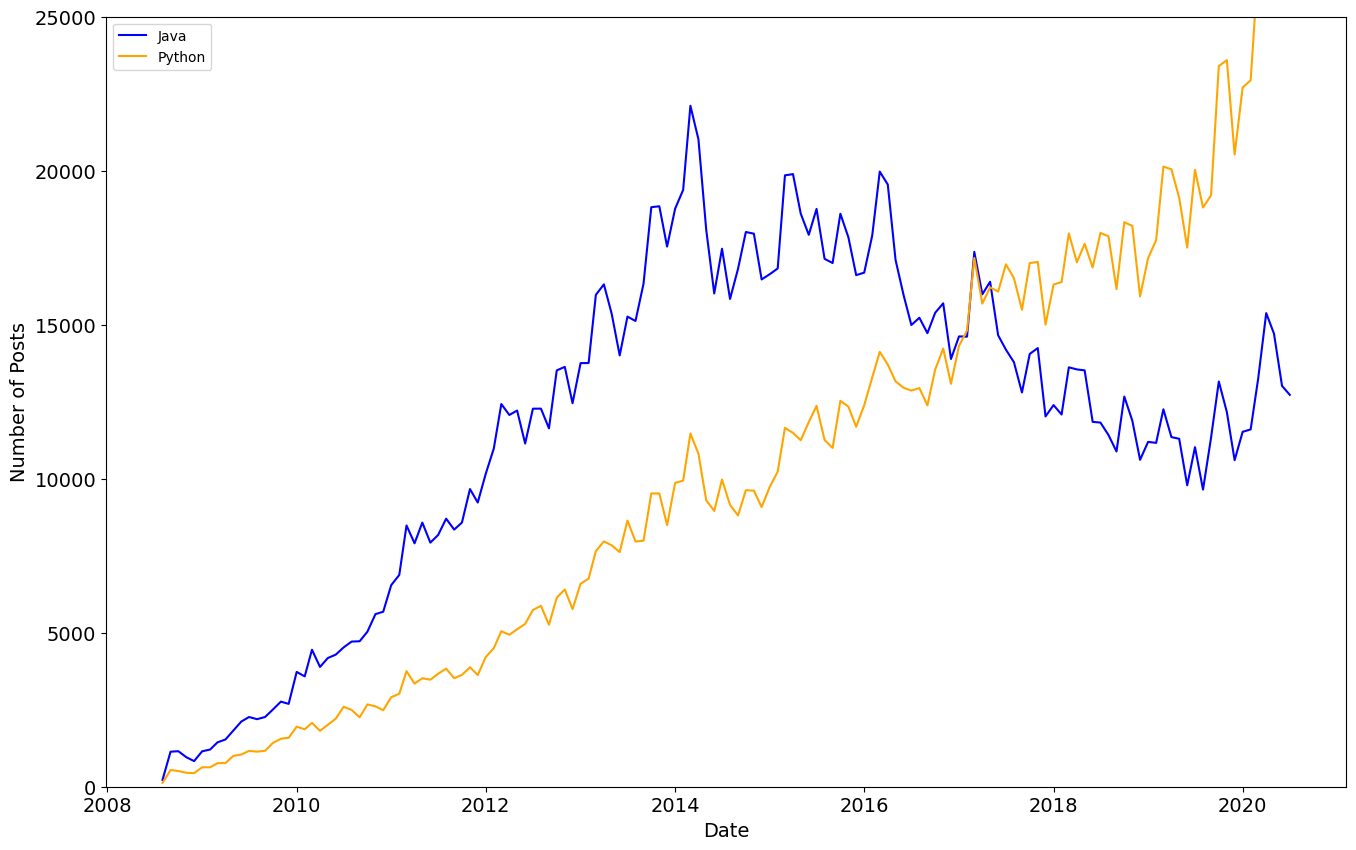

In [163]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,25000)
plt.plot(df_java["DATE"], df_java["POSTS"], color="blue", label="Java")
plt.plot(df_python["DATE"], df_python["POSTS"], color="orange", label="Python")
plt.legend()
plt.show()

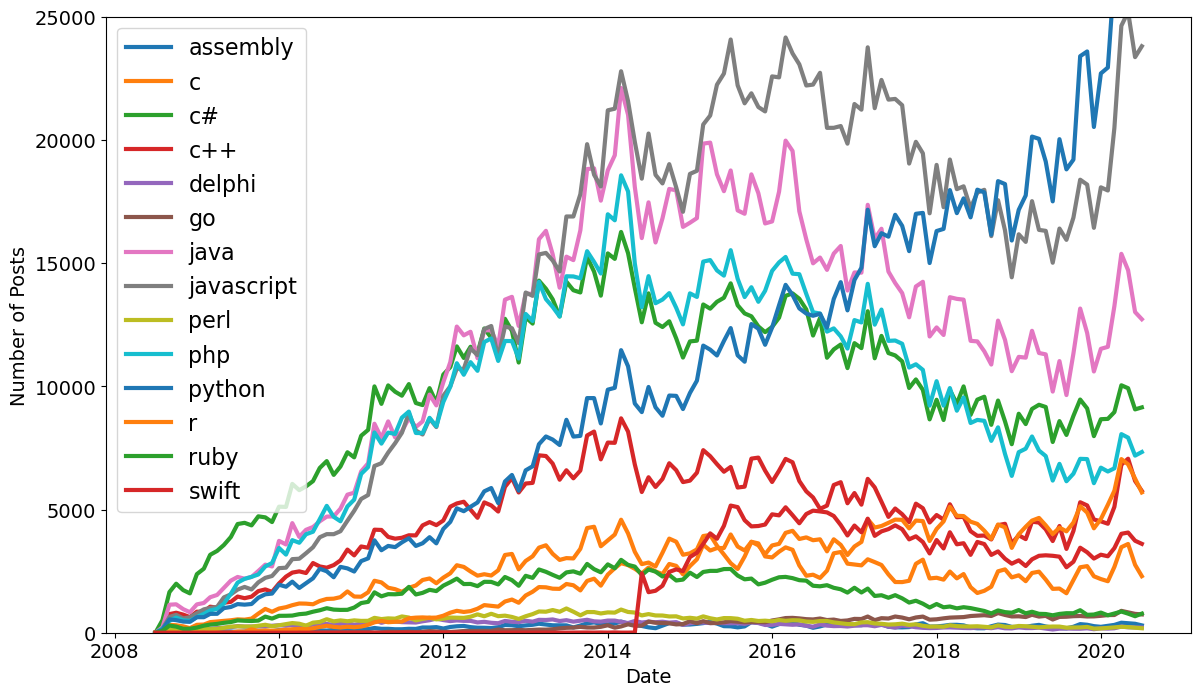

In [164]:
## Plot all languages:
plt.figure(figsize=(14,8)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,25000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [165]:
# Average some observations to make the lines "cleaner"


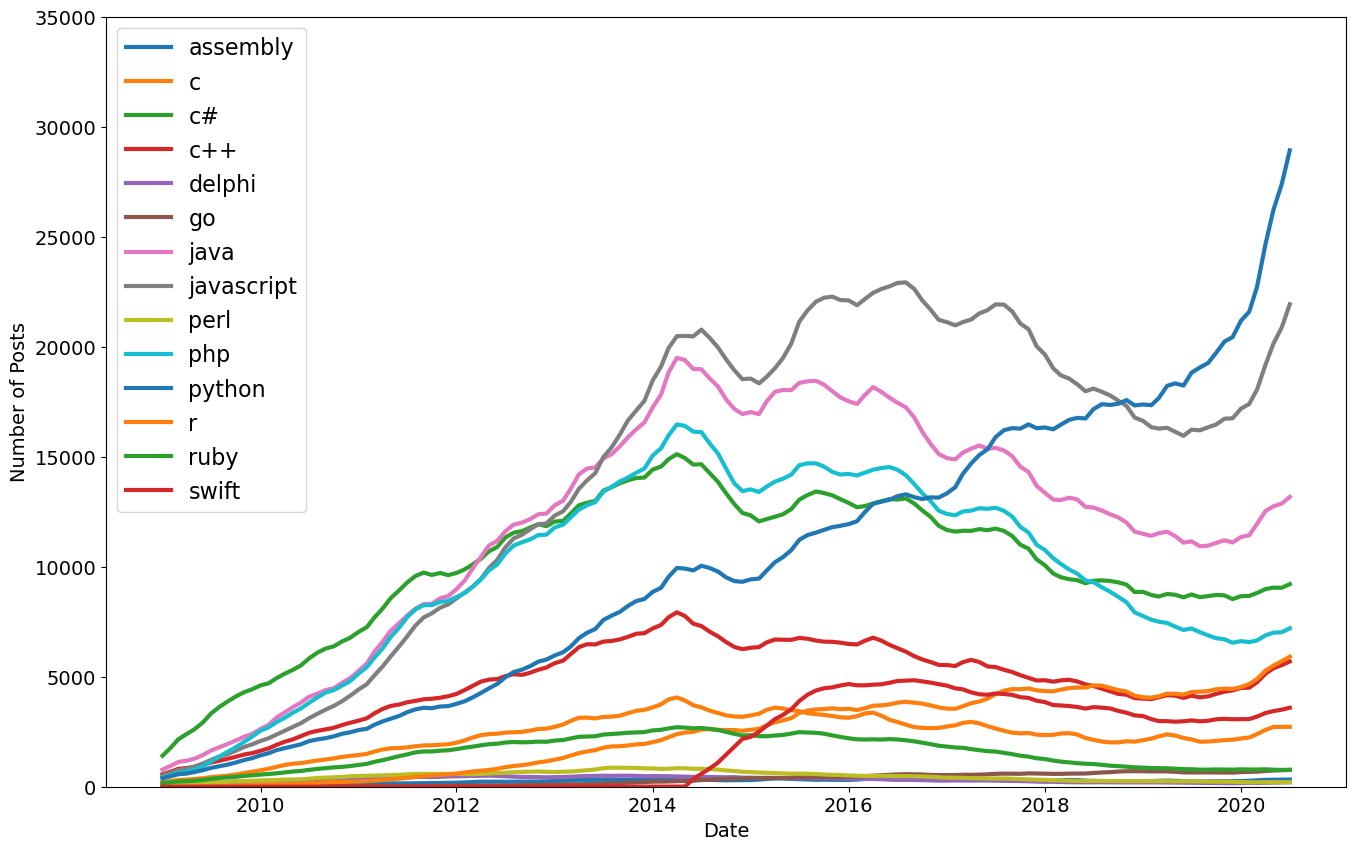

In [166]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=7).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

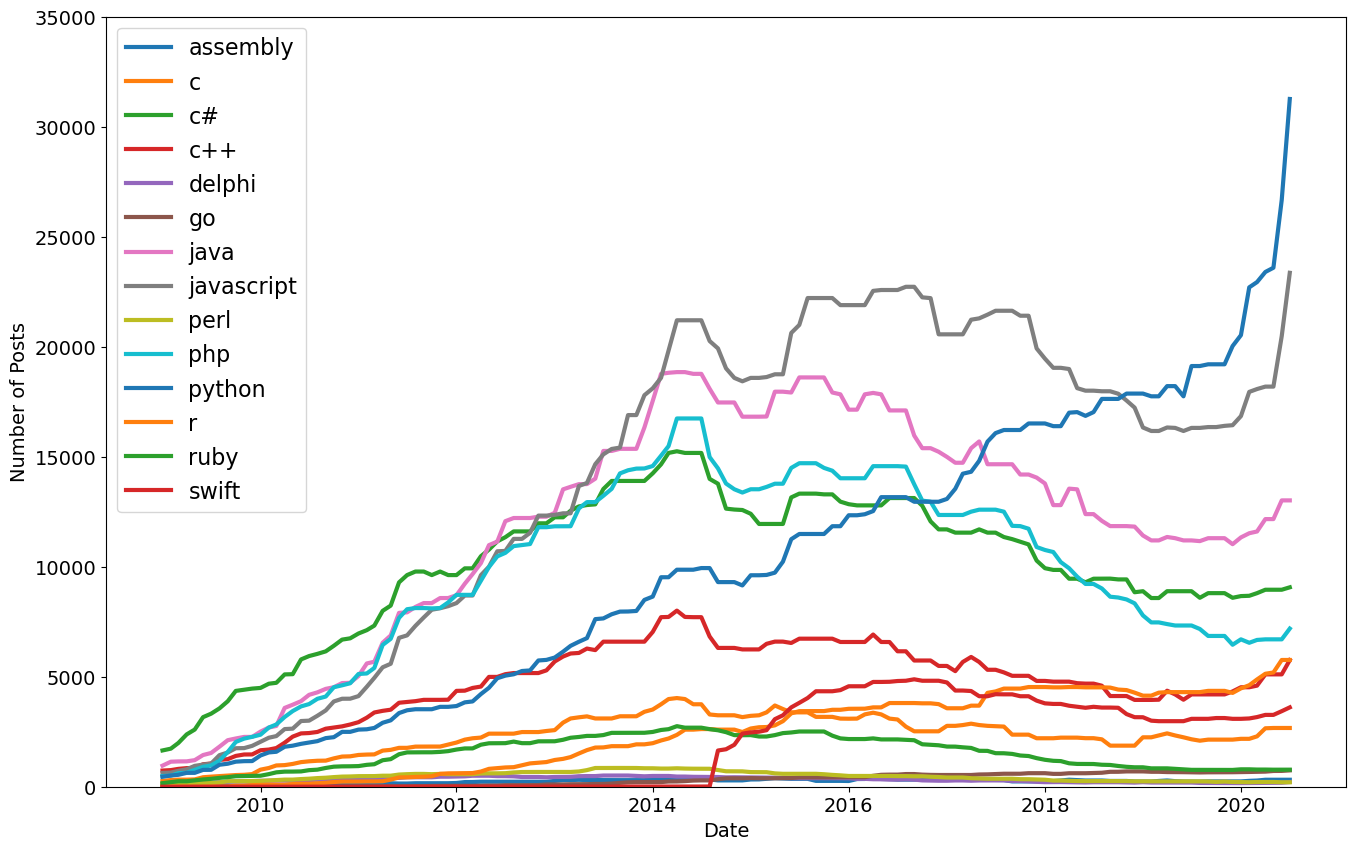

In [167]:
# The window is number of observations that are median
roll_df = reshaped_df.rolling(window=7).median()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)